In [74]:
from lxml import etree
import numpy as np
import matplotlib.pylab as plt 
import pandas as pd

In [50]:
path = 'cubicasa5k/high_quality/11131/model.svg'
tree = etree.parse(open(path,'r'))

In [51]:
ind = 0
tags = []
for element in tree.iter():
    if element.tag.split('}')[1] == 'text':
        ind +=1
        #print(element.text)
        if np.mod(ind,3) ==2:
            k = element.text[0]
            if k not in {'1','2','3','4','5','6','7','8','9'}:
                break
        if np.mod(ind,3) ==1:
            tags.append(element.text) 
#tags[:-1]

## 从这里开始！！！ 

In [12]:
from os import walk

#Here we use f to save all file directories
f = []
mypath = 'cubicasa5k/high_quality/'
for (dirpath, dirnames, filenames) in walk(mypath):
    f = dirnames
    break
    

In [47]:
size_original = []
size_scaled = []
for i in f:
    index = int(i)
    im_orig = plt.imread(mypath+i+'/F1_original.png')
    size_original.append([index,im_orig.shape[0],im_orig.shape[1]])
    
    im_scaled= plt.imread(mypath+i+'/F1_scaled.png')
    size_scaled.append([index,im_scaled.shape[0],im_scaled.shape[1]])
size_original = np.array(size_original)
size_scaled = np.array(size_scaled)

In [54]:
np.save('s1.npy',size_original)
np.save('s2.npy',size_scaled)
#size_original = np.load('s1.npy')
#size_scaled = np.load('s2.npy')

我每个household 取了一张图，第二层我都忽略了 感觉不影响，你要是觉得也应该放进去改一下也可～

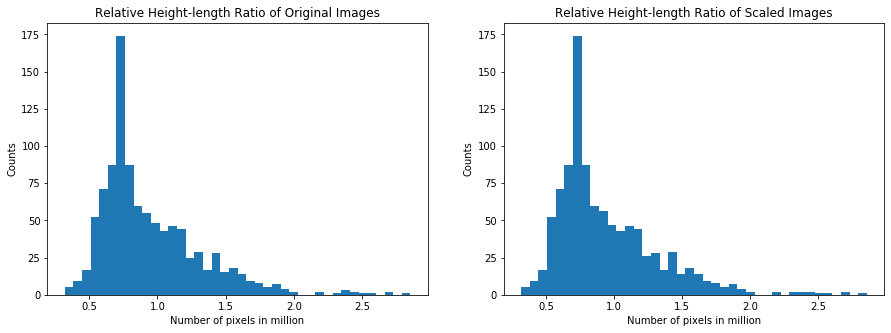

In [90]:
#vertial-length to horizontal-length  ratio
plt.figure(figsize=(15, 5))


areas1 = size_original[:,1]/ size_original[:,2]
plt.subplot(1,2,1)
plt.hist(areas1,bins = 40)
plt.xlabel('Number of pixels in million')
plt.ylabel('Counts')
_= plt.title('Relative Height-length Ratio of Original Images')


areas = size_scaled[:,1]/ size_scaled[:,2]
plt.subplot(1,2,2)
plt.hist(areas,bins = 40)
plt.xlabel('Number of pixels in million')
plt.ylabel('Counts')
_= plt.title('Relative Height-length Ratio of Scaled Images')

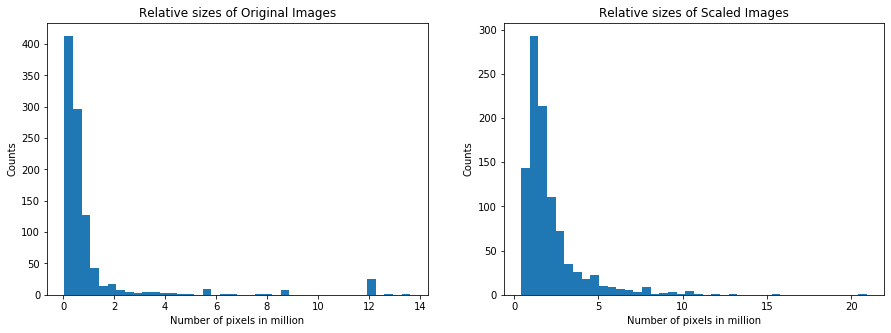

In [87]:
plt.figure(figsize=(15, 5))


areas1 = size_original[:,1]* size_original[:,2]/1000000
plt.subplot(1,2,1)
plt.hist(areas1,bins = 40)
plt.xlabel('Number of pixels in million')
plt.ylabel('Counts')
_= plt.title('Relative sizes of Original Images')


areas = size_scaled[:,1]* size_scaled[:,2]/1000000
plt.subplot(1,2,2)
plt.hist(areas,bins = 40)
plt.xlabel('Number of pixels in million')
plt.ylabel('Counts')
_= plt.title('Relative sizes of Scaled Images')